# LHE

In [2]:
from pyfeyn2.render.all import AllRender
import pylhe
from feynml.interface.lhe import lhe_event_to_feynman
from pyfeyn2.auto.position import feynman_adjust_points
from feynml.feynml import FeynML
import smpl_io.io as io
from pyfeyn2.interface.dot import feynman_to_dot,dot_to_positions

In [5]:
print(io.read("example.lhe"))

<LesHouchesEvents version="3.0">
<!--
file generated with POWHEG-BOX-V2
Input file powheg.input contained:
vdecaymode  1     ! Z decay products (default 2): 1 for electronic

numevts 20000	! number of events to be generated
ih1   1           ! hadron 1 (1 for protons, -1 for antiprotons)
ih2   1           ! hadron 2 (1 for protons, -1 for antiprotons)
ebeam1 2510d0      ! energy of beam 1
ebeam2 2510d0      ! energy of beam 2


bornktmin 0.25     !  (default 0d0) generation cut. Minimum kt in underlying Born
##bornsuppfact 10d0 ! (default 0d0) mass param for Born suppression factor. If < 0 suppfact = 1


! To be set only if using LHA pdfs
lhans1 27100 ! pdf set for hadron 1 (LHA numbering)
lhans2 27100 ! pdf set for hadron 2 (LHA numbering)	

! Parameters to allow or not the use of stored data
use-old-grid    1 ! if 1 use old grid if file pwggrids.dat is present (<> 1 regenerate)
use-old-ubound  1 ! if 1 use norm of upper bounding function stored in pwgubound.dat, if present; <>

ncall

<?xml version="1.0" encoding="UTF-8"?>
<feynml version="0.1.7.22">
  <head>
    <meta name="feynml" content="0.1.7.22"/>
    <style/>
  </head>
  <diagram id="FeynmanDiagram9" style="layout: dot" class="test" sheet="">
    <propagator id="Leg3" pdgid="23" type="boson" style="">
      <name>Z0</name>
      <source>Vertex0</source>
      <target>Vertex3</target>
    </propagator>
    <vertex id="Vertex0" style=""/>
    <vertex id="Vertex3" style=""/>
    <leg id="Leg1" pdgid="2" type="fermion" style="color: red">
      <name>u</name>
      <target>Vertex0</target>
      <sense>incoming</sense>
    </leg>
    <leg id="Leg2" pdgid="21" type="gluon" style="color: green">
      <name>g</name>
      <target>Vertex0</target>
      <sense>incoming</sense>
    </leg>
    <leg id="Leg6" pdgid="2" type="fermion" style="">
      <name>u</name>
      <target>Vertex0</target>
      <sense>outgoing</sense>
    </leg>
    <leg id="Leg4" pdgid="11" type="fermion" style="">
      <name>e-</name>
      <t

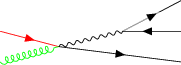

pyx:


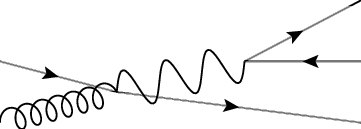

feynmp:


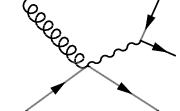

feynman:


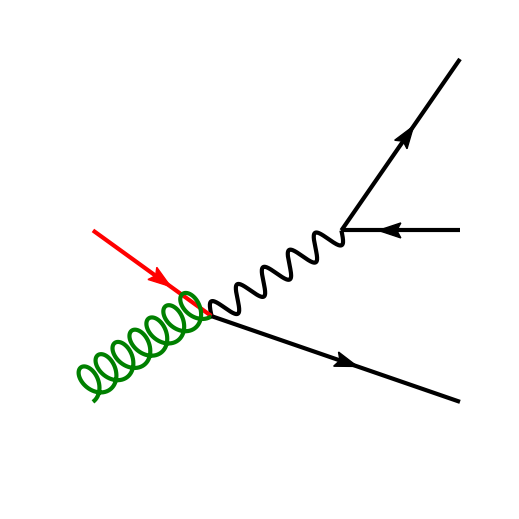

dot:


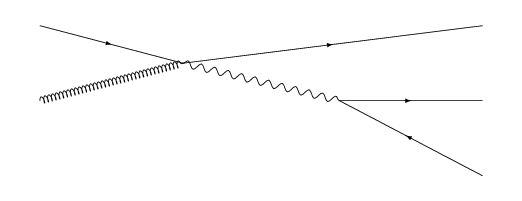

asciipdf:


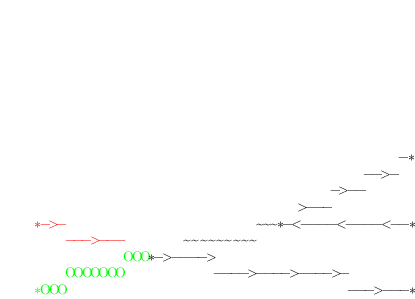

unicodepdf:


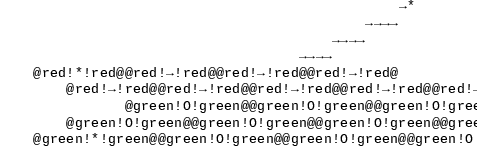

In [8]:
events = pylhe.read_lhe("example.lhe")
for event in events:
    fd = lhe_event_to_feynman(event).with_class("test").with_style("layout : dot")#.with_style_property("layout", "dot")
    fd.get_point("Leg1").with_color("red")
    fd.get_point("Leg2").with_color("green")
    print(FeynML(diagrams=[fd]).to_xml())
    fd = feynman_adjust_points(fd,clear_vertices=False)
    AllRender(fd).render()
    break